# прогнозирование аэродинамических коэффициентов аэродинамического профиля с использованием искусственной нейронной сети

В этом блокноте искусственная нейронная сеть моделируется для прогнозирования аэродинамических коэффициентов крылового профиля, который летит при номинальных условиях числа Маха M = 0,729, где данные изменения M и угла атаки α приводят к различным коэффициентам подъемной силы Cl, коэффициенту лобового сопротивления. Cd с использованием Tensorflow и Keras

In [6]:
! pip install matplotlib
! pip install tensorflow
! pip install pandas
! pip install numpy


  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4847 sha256=f78edc5655f529fc07faab3cf83bf6f7f50ea803412cc19a6a7855401dd4405c
  Stored in directory: c:\users\mashkevich\appdata\local\pip\cache\wheels\b6\0d\90\0d1bbd99855f99cb2f6c2e5ff96f8023fad8ec367695f7d72d
Successfully built termcolor


### Импорт библиотек

In [8]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.metrics import mean_squared_error

### Импортируем данные

In [2]:
datafile = pd.read_csv('diplom_data1.csv').drop(columns = 'n')

In [3]:
datafile

,AoA,s,h_otn,cx,cy
0,0,0.495,999.90,0.016254,0.144729
1,0,0.990,1999.80,0.015947,0.210299
2,0,1.485,2999.70,0.015499,0.251017
3,0,1.980,3999.60,0.015006,0.278936
4,0,2.475,4999.50,0.014565,0.299458
...,...,...,...,...,...
175,10,2.475,3999.60,0.075937,0.991650
176,10,2.475,2999.70,0.075974,0.992389
177,10,2.475,1999.80,0.072602,1.006295
178,10,2.475,1499.85,0.070082,1.010094


### Визуализация данных

Построение данных для лучшей визуализации распределения и линейности данных.

#### Коэффициент подъемной силы Cl визуализация

C:\Users\MASHKE~1\AppData\Local\Temp/ipykernel_9608/1009773561.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  clplot = Axes3D(figcl)


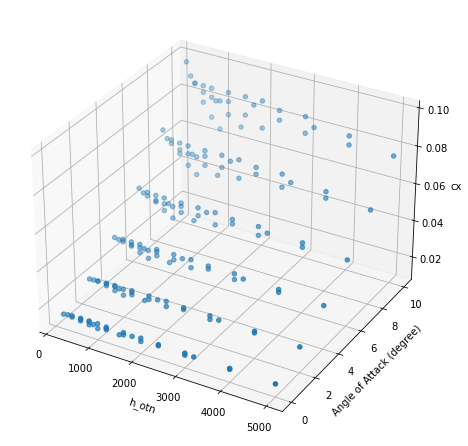

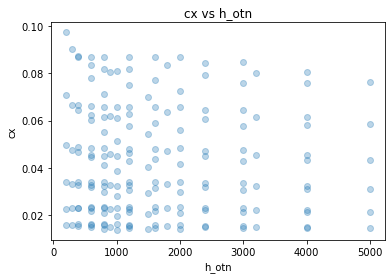

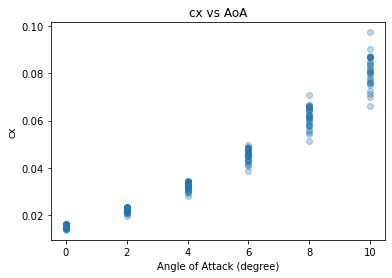

In [9]:
figcl = plt.figure(figsize = [6,6])
clplot = Axes3D(figcl)
clplot.scatter(datafile['h_otn'], datafile['AoA'], datafile['cx'])
clplot.set_xlabel('h_otn')
clplot.set_ylabel('Angle of Attack (degree)')
clplot.set_zlabel('cx')
plt.show()

plt.scatter(datafile['h_otn'], datafile['cx'], alpha = 0.3)
plt.xlabel('h_otn')
plt.ylabel('cx')
plt.title('cx vs h_otn')
plt.show()

plt.scatter(datafile['AoA'], datafile['cx'], alpha = 0.3)
plt.xlabel('Angle of Attack (degree)')
plt.ylabel('cx')
plt.title('cx vs AoA')
plt.show()

#### Коэффициент лобового спорпотивления Cd Визуализация

C:\Users\MASHKE~1\AppData\Local\Temp/ipykernel_9608/1626326054.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  cdplot = Axes3D(figcd)


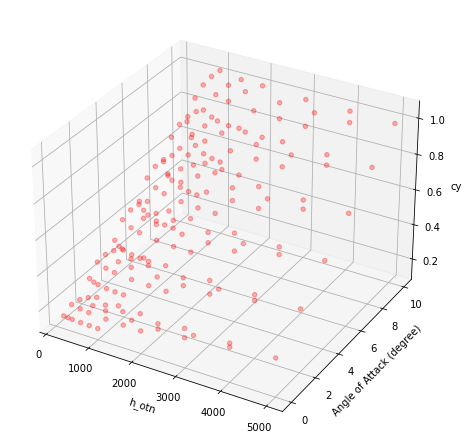

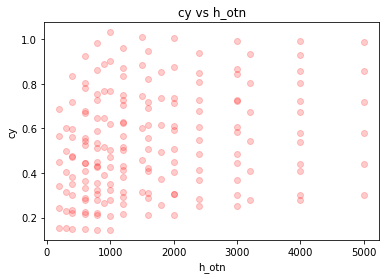

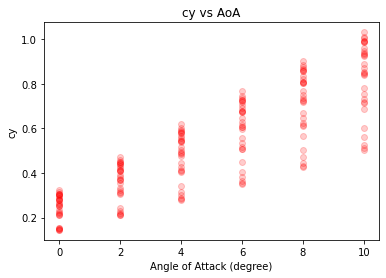

In [10]:
figcd = plt.figure(figsize = [6,6])
cdplot = Axes3D(figcd)
cdplot.scatter(datafile['h_otn'], datafile['AoA'], datafile['cy'], c = 'r', alpha = 0.3)
cdplot.set_xlabel('h_otn')
cdplot.set_ylabel('Angle of Attack (degree)')
cdplot.set_zlabel('cy')
plt.show()

plt.scatter(datafile['h_otn'], datafile['cy'], alpha = 0.2, c = 'r')
plt.xlabel('h_otn')
plt.ylabel('cy')
plt.title('cy vs h_otn')
plt.show()

plt.scatter(datafile['AoA'], datafile['cy'], alpha = 0.2, c = 'r')
plt.xlabel('Angle of Attack (degree)')
plt.ylabel('cy')
plt.title('cy vs AoA')
plt.show()

### Корреляция

Проверка коэффициента корреляции Пирсона для измерения статистической взаимосвязи или ассоциации между переменными.

In [ ]:
df_heatmap = sns.heatmap(datafile.corr(), annot = True, cmap = 'coolwarm')

### Данные входа и вывода
Определение входных и выходных данных.

In [12]:
X = datafile.loc[:, ['h_otn', 'AoA','s']]
y = datafile.loc[:, ['cx', 'cy']]

In [ ]:
X #Входные данные

In [ ]:
y #Выходные данные

In [13]:
k=[]
y_train2= np.array(y)

for i in range (len(y_train2)):
    if y_train2[i][0]!= 0 :
         k.append(y_train2[i][1]/y_train2[i][0])
    else:
        print("cx=0")
max_k=max(k)    
print (max_k)      
print (k.index(max(k))) 
print(y_train2[k.index(max(k))])

24.10034625385666
79
[0.01958471 0.47199835]


### Разделение датасета на тестовый и на обучающий


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 29)

визуализация разделённых данных

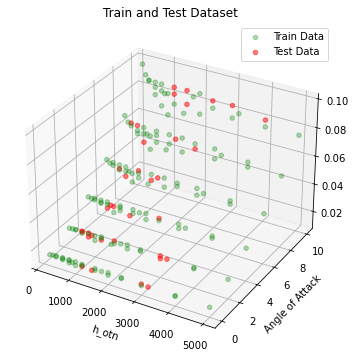

In [15]:
# Creating figure
fig = plt.figure(figsize = (8, 6))
visual_split = plt.axes(projection ="3d")
 
# Creating plot
visual_split.scatter3D(X_train['h_otn'], X_train['AoA'], y_train['cx'], color = "green", alpha=0.3, label='Train Data')
visual_split.scatter3D(X_test['h_otn'], X_test['AoA'], y_test['cx'], color = "red",alpha=0.5, label='Test Data')
plt.title("Train and Test Dataset")
plt.xlabel('h_otn')
plt.ylabel('Angle of Attack')
plt.legend()
plt.show()


## Нормализация данных

Нормализация гарантирует, что величина значений, которые принимает функция, более или менее одинакова.

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scalery = MinMaxScaler()

In [17]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = scalery.fit_transform(y_train)
y_test = scalery.transform(y_test)

## Моделирование нейросети


Функция активации для скрытого уровня сети использует функцию выпрямленных линейных единиц (ReLU), поскольку это простая, быстрая и наблюдаемая сходимость гораздо быстрее и надежнее.

Алгоритм исключения закомментирован, поскольку он не обеспечивает улучшений после нескольких тренировок, а вместо этого используется метод ранней остановки, чтобы избежать переобучения нашей нейронной сети для набора данных.

Оптимизатор - это оптимизатор адама, поскольку он обеспечивает адаптивную скорость обучения для лучшей оптимизации.

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [19]:
NNmodel = Sequential()

NNmodel.add(Dense(6,activation='relu')) #Hidden Layer
#NNmodel.add(Dropout(0.2))
NNmodel.add(Dense(6,activation='relu')) #Hidden Layer
#NNmodel.add(Dropout(0.2))
NNmodel.add(Dense(6,activation='relu')) #Hidden Layer
#NNmodel.add(Dropout(0.2))

NNmodel.add(Dense(units = 2,activation='linear')) #Output Layer

NNmodel.compile(loss='mse', optimizer='adam')

### Метод ранней остановки

Чтобы избежать переобучения при обучении нейронной сети, добавлен метод ранней остановки. Ранняя остановка - это форма регуляризации, используемая во избежание переобучения при обучении учащегося итеративным методам.

In [20]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

### Обучение

In [21]:
NNmodel.fit(x=X_train, y=y_train, epochs=1000, validation_data=(X_test,y_test), callbacks=[early_stop])

Epoch 1/1000
5/5 [==============================] - 0s 22ms/step - loss: 0.2317 - val_loss: 0.2363
Epoch 2/1000
5/5 [==============================] - 0s 6ms/step - loss: 0.2221 - val_loss: 0.2283
Epoch 3/1000
5/5 [==============================] - 0s 4ms/step - loss: 0.2139 - val_loss: 0.2216
Epoch 4/1000
5/5 [==============================] - 0s 4ms/step - loss: 0.2074 - val_loss: 0.2146
Epoch 5/1000
5/5 [==============================] - 0s 4ms/step - loss: 0.2005 - val_loss: 0.2070
Epoch 6/1000
5/5 [==============================] - 0s 4ms/step - loss: 0.1932 - val_loss: 0.1991
Epoch 7/1000
5/5 [==============================] - 0s 4ms/step - loss: 0.1858 - val_loss: 0.1913
Epoch 8/1000
5/5 [==============================] - 0s 4ms/step - loss: 0.1788 - val_loss: 0.1836
Epoch 9/1000
5/5 [==============================] - 0s 4ms/step - loss: 0.1710 - val_loss: 0.1760
Epoch 10/1000
5/5 [==============================] - 0s 5ms/step - loss: 0.1641 - val_loss: 0.1682
Epoch 11/1000
5/5 

Epoch 84/1000
5/5 [==============================] - 0s 4ms/step - loss: 0.0170 - val_loss: 0.0138
Epoch 85/1000
5/5 [==============================] - 0s 4ms/step - loss: 0.0163 - val_loss: 0.0129
Epoch 86/1000
5/5 [==============================] - 0s 4ms/step - loss: 0.0156 - val_loss: 0.0121
Epoch 87/1000
5/5 [==============================] - 0s 4ms/step - loss: 0.0149 - val_loss: 0.0113
Epoch 88/1000
5/5 [==============================] - 0s 4ms/step - loss: 0.0142 - val_loss: 0.0107
Epoch 89/1000
5/5 [==============================] - 0s 4ms/step - loss: 0.0137 - val_loss: 0.0102
Epoch 90/1000
5/5 [==============================] - 0s 4ms/step - loss: 0.0132 - val_loss: 0.0098
Epoch 91/1000
5/5 [==============================] - 0s 4ms/step - loss: 0.0127 - val_loss: 0.0094
Epoch 92/1000
5/5 [==============================] - 0s 4ms/step - loss: 0.0123 - val_loss: 0.0091
Epoch 93/1000
5/5 [==============================] - 0s 4ms/step - loss: 0.0120 - val_loss: 0.0088
Epoch 94/1

5/5 [==============================] - 0s 4ms/step - loss: 0.0049 - val_loss: 0.0041
Epoch 167/1000
5/5 [==============================] - 0s 4ms/step - loss: 0.0049 - val_loss: 0.0042
Epoch 168/1000
5/5 [==============================] - 0s 4ms/step - loss: 0.0049 - val_loss: 0.0041
Epoch 169/1000
5/5 [==============================] - 0s 4ms/step - loss: 0.0048 - val_loss: 0.0039
Epoch 170/1000
5/5 [==============================] - 0s 5ms/step - loss: 0.0047 - val_loss: 0.0039
Epoch 171/1000
5/5 [==============================] - 0s 4ms/step - loss: 0.0047 - val_loss: 0.0040
Epoch 172/1000
5/5 [==============================] - 0s 4ms/step - loss: 0.0046 - val_loss: 0.0041
Epoch 173/1000
5/5 [==============================] - 0s 4ms/step - loss: 0.0046 - val_loss: 0.0038
Epoch 174/1000
5/5 [==============================] - 0s 4ms/step - loss: 0.0045 - val_loss: 0.0038
Epoch 175/1000
5/5 [==============================] - 0s 4ms/step - loss: 0.0045 - val_loss: 0.0039
Epoch 176/1000


5/5 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.0022
Epoch 249/1000
5/5 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.0022
Epoch 250/1000
5/5 [==============================] - 0s 4ms/step - loss: 0.0020 - val_loss: 0.0022
Epoch 251/1000
5/5 [==============================] - 0s 4ms/step - loss: 0.0020 - val_loss: 0.0022
Epoch 252/1000
5/5 [==============================] - 0s 4ms/step - loss: 0.0020 - val_loss: 0.0021
Epoch 253/1000
5/5 [==============================] - 0s 4ms/step - loss: 0.0020 - val_loss: 0.0021
Epoch 254/1000
5/5 [==============================] - 0s 4ms/step - loss: 0.0020 - val_loss: 0.0021
Epoch 255/1000
5/5 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 0.0020
Epoch 256/1000
5/5 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 0.0020
Epoch 257/1000
5/5 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 0.0020
Epoch 258/1000


Epoch 330/1000
5/5 [==============================] - 0s 4ms/step - loss: 9.8164e-04 - val_loss: 8.9872e-04
Epoch 331/1000
5/5 [==============================] - 0s 4ms/step - loss: 9.6794e-04 - val_loss: 9.2376e-04
Epoch 332/1000
5/5 [==============================] - 0s 5ms/step - loss: 9.5680e-04 - val_loss: 9.0099e-04
Epoch 333/1000
5/5 [==============================] - 0s 4ms/step - loss: 9.4794e-04 - val_loss: 8.8404e-04
Epoch 334/1000
5/5 [==============================] - 0s 4ms/step - loss: 9.4195e-04 - val_loss: 8.9423e-04
Epoch 335/1000
5/5 [==============================] - 0s 4ms/step - loss: 9.3390e-04 - val_loss: 8.5887e-04
Epoch 336/1000
5/5 [==============================] - 0s 4ms/step - loss: 9.2170e-04 - val_loss: 8.4538e-04
Epoch 337/1000
5/5 [==============================] - 0s 4ms/step - loss: 9.1698e-04 - val_loss: 8.3893e-04
Epoch 338/1000
5/5 [==============================] - 0s 4ms/step - loss: 9.1034e-04 - val_loss: 8.2375e-04
Epoch 339/1000
5/5 [========

Epoch 406/1000
5/5 [==============================] - 0s 4ms/step - loss: 5.8769e-04 - val_loss: 4.2481e-04
Epoch 407/1000
5/5 [==============================] - 0s 4ms/step - loss: 5.8628e-04 - val_loss: 4.2631e-04
Epoch 408/1000
5/5 [==============================] - 0s 4ms/step - loss: 5.8339e-04 - val_loss: 4.1621e-04
Epoch 409/1000
5/5 [==============================] - 0s 4ms/step - loss: 5.8798e-04 - val_loss: 4.0738e-04
Epoch 410/1000
5/5 [==============================] - 0s 4ms/step - loss: 5.8417e-04 - val_loss: 4.1973e-04
Epoch 411/1000
5/5 [==============================] - 0s 4ms/step - loss: 5.8072e-04 - val_loss: 3.9956e-04
Epoch 412/1000
5/5 [==============================] - 0s 4ms/step - loss: 5.7362e-04 - val_loss: 3.9612e-04
Epoch 413/1000
5/5 [==============================] - 0s 4ms/step - loss: 5.7699e-04 - val_loss: 4.0143e-04
Epoch 414/1000
5/5 [==============================] - 0s 4ms/step - loss: 5.7255e-04 - val_loss: 3.9507e-04
Epoch 415/1000
5/5 [========

Epoch 482/1000
5/5 [==============================] - 0s 4ms/step - loss: 4.7131e-04 - val_loss: 2.8290e-04
Epoch 483/1000
5/5 [==============================] - 0s 4ms/step - loss: 4.7754e-04 - val_loss: 2.8153e-04
Epoch 484/1000
5/5 [==============================] - 0s 4ms/step - loss: 4.7019e-04 - val_loss: 2.8642e-04
Epoch 485/1000
5/5 [==============================] - 0s 4ms/step - loss: 4.7289e-04 - val_loss: 2.8367e-04
Epoch 486/1000
5/5 [==============================] - 0s 4ms/step - loss: 4.6853e-04 - val_loss: 2.8535e-04
Epoch 487/1000
5/5 [==============================] - 0s 4ms/step - loss: 4.6853e-04 - val_loss: 2.9141e-04
Epoch 488/1000
5/5 [==============================] - 0s 4ms/step - loss: 4.6843e-04 - val_loss: 2.8569e-04
Epoch 489/1000
5/5 [==============================] - 0s 4ms/step - loss: 4.6805e-04 - val_loss: 2.8172e-04
Epoch 490/1000
5/5 [==============================] - 0s 4ms/step - loss: 4.6924e-04 - val_loss: 2.7897e-04
Epoch 491/1000
5/5 [========

Epoch 558/1000
5/5 [==============================] - 0s 4ms/step - loss: 4.3330e-04 - val_loss: 2.7708e-04
Epoch 559/1000
5/5 [==============================] - 0s 4ms/step - loss: 4.3543e-04 - val_loss: 2.7613e-04
Epoch 560/1000
5/5 [==============================] - 0s 4ms/step - loss: 4.3677e-04 - val_loss: 2.7446e-04
Epoch 561/1000
5/5 [==============================] - 0s 4ms/step - loss: 4.3402e-04 - val_loss: 2.7780e-04
Epoch 562/1000
5/5 [==============================] - 0s 4ms/step - loss: 4.4254e-04 - val_loss: 2.7938e-04
Epoch 563/1000
5/5 [==============================] - 0s 4ms/step - loss: 4.2894e-04 - val_loss: 2.7919e-04
Epoch 564/1000
5/5 [==============================] - 0s 4ms/step - loss: 4.3408e-04 - val_loss: 2.7305e-04
Epoch 565/1000
5/5 [==============================] - 0s 4ms/step - loss: 4.3345e-04 - val_loss: 2.7210e-04
Epoch 566/1000
5/5 [==============================] - 0s 4ms/step - loss: 4.3581e-04 - val_loss: 2.7640e-04
Epoch 567/1000
5/5 [========

### График потерь во время обучения

<AxesSubplot:>

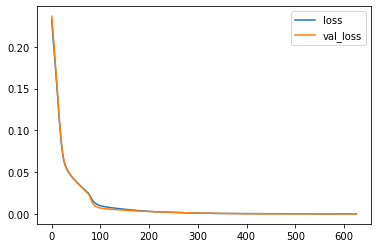

In [22]:
losses = pd.DataFrame(NNmodel.history.history)
losses[['loss', 'val_loss']].plot()

### Прогнозирование

In [23]:
predictions = NNmodel.predict(X_test)

### Среднеквадратичная ошибка и средняя абсолютная ошибка результатов прогноза

In [24]:
mse_cx = mean_squared_error(y_test[:,0], predictions[:,0])
print(f"Mean Squared Error for cx: {mse_cx}")
mae_cx = np.sum(np.absolute(y_test[:,0]- predictions[:,0]))/len(y_test)
print(f"Mean Absolute Error for cx: {mae_cx}\n")
mse_cy = mean_squared_error(y_test[:,1], predictions[:,1])
print(f"Mean Squared Error for cy: {mse_cy}")
mae_cy = np.sum(np.absolute(y_test[:,1]- predictions[:,1]))/len(y_test)
print(f"Mean Absolute Error for cy: {mae_cy}\n")
#mse_cp = mean_squared_error(y_test[:,2], predictions[:,2])
#print(f"Mean Squared Error for Cp: {mse_cp}")
#mae_cp = np.sum(np.absolute(y_test[:,2]- predictions[:,2]))/len(y_test)
#print(f"Mean Absolute Error for Cp: {mae_cp}\n")

Mean Squared Error for cx: 0.0001855531196707838
Mean Absolute Error for cx: 0.010560312810859649

Mean Squared Error for cy: 0.00036236893244787766
Mean Absolute Error for cy: 0.015518140168350717



In [25]:
predictions = scalery.inverse_transform(predictions)
y_test = scalery.inverse_transform(y_test)

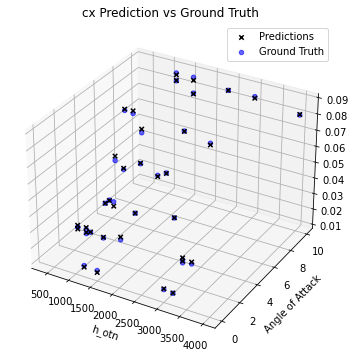

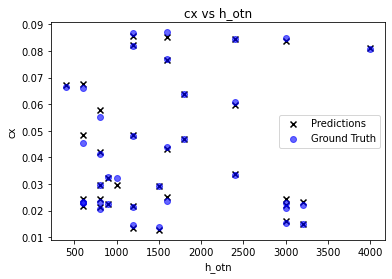

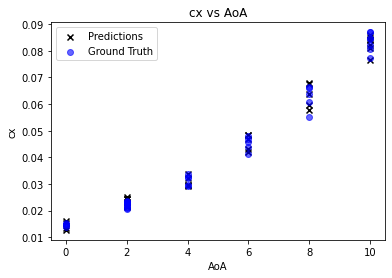

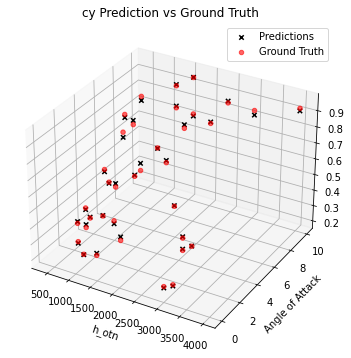

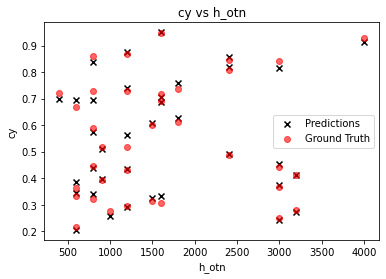

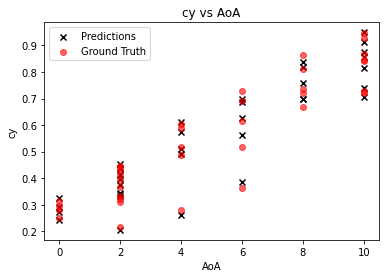

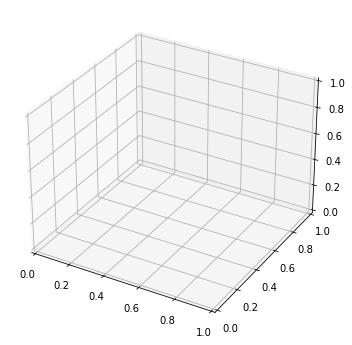

In [26]:
###############################Cl
# Creating figure Cl
fig = plt.figure(figsize = (8, 6))
visual_split = plt.axes(projection ="3d")
 
# Creating plot
visual_split.scatter3D(scaler.inverse_transform(X_test)[:,0], scaler.inverse_transform(X_test)[:,1], predictions[:,0], color = "black", alpha=1, label='Predictions', marker='x')
visual_split.scatter3D(scaler.inverse_transform(X_test)[:,0], scaler.inverse_transform(X_test)[:,1], y_test[:,0], color = "blue", alpha=0.6, label='Ground Truth')
plt.title("cx Prediction vs Ground Truth")
plt.xlabel('h_otn')
plt.ylabel('Angle of Attack')
plt.legend()
plt.show()

plt.scatter(scaler.inverse_transform(X_test)[:,0], predictions[:,0], color = "black", alpha=1, label='Predictions', marker='x')
plt.scatter(scaler.inverse_transform(X_test)[:,0], y_test[:,0], color = "blue", alpha=0.6, label='Ground Truth')
plt.xlabel('h_otn')
plt.ylabel('cx')
plt.title('cx vs h_otn')
plt.legend()
plt.show()

plt.scatter(scaler.inverse_transform(X_test)[:,1], predictions[:,0], color = "black", alpha=1, label='Predictions', marker='x')
plt.scatter(scaler.inverse_transform(X_test)[:,1], y_test[:,0], color = "blue", alpha=0.6, label='Ground Truth')
plt.xlabel('AoA')
plt.ylabel('cx')
plt.title('cx vs AoA')
plt.legend()
plt.show()

##############################Cd
# Creating figure Cd
fig = plt.figure(figsize = (8, 6))
visual_split = plt.axes(projection ="3d")
 
# Creating plot
visual_split.scatter3D(scaler.inverse_transform(X_test)[:,0], scaler.inverse_transform(X_test)[:,1], predictions[:,1], color = "black", alpha=1, label='Predictions', marker='x')
visual_split.scatter3D(scaler.inverse_transform(X_test)[:,0], scaler.inverse_transform(X_test)[:,1], y_test[:,1], color = "red", alpha=0.6, label='Ground Truth')
plt.title("cy Prediction vs Ground Truth")
plt.xlabel('h_otn')
plt.ylabel('Angle of Attack')
plt.legend()
plt.show()

plt.scatter(scaler.inverse_transform(X_test)[:,0], predictions[:,1], color = "black", alpha=1, label='Predictions', marker='x')
plt.scatter(scaler.inverse_transform(X_test)[:,0], y_test[:,1], color = "red", alpha=0.6, label='Ground Truth')
plt.xlabel('h_otn')
plt.ylabel('cy')
plt.title('cy vs h_otn')
plt.legend()
plt.show()

plt.scatter(scaler.inverse_transform(X_test)[:,1], predictions[:,1], color = "black", alpha=1, label='Predictions', marker='x')
plt.scatter(scaler.inverse_transform(X_test)[:,1], y_test[:,1], color = "red", alpha=0.6, label='Ground Truth')
plt.xlabel('AoA')
plt.ylabel('cy')
plt.title('cy vs AoA')
plt.legend()
plt.show()

##############################Cp
# Creating figure Cp
fig = plt.figure(figsize = (8, 6))
visual_split = plt.axes(projection ="3d")
 
# Creating plot
#visual_split.scatter3D(scaler.inverse_transform(X_test)[:,0], scaler.inverse_transform(X_test)[:,1], predictions[:,2], color = "black", alpha=1, label='Predictions', marker='x')
#visual_split.scatter3D(scaler.inverse_transform(X_test)[:,0], scaler.inverse_transform(X_test)[:,1], y_test[:,2], color = "g", alpha=0.6, label='Ground Truth')
#plt.title("Cp Prediction vs Ground Truth")
#plt.xlabel('Mach Number')
#plt.ylabel('Angle of Attack')
#plt.legend()
#plt.show()

#plt.scatter(scaler.inverse_transform(X_test)[:,0], predictions[:,2], color = "black", alpha=1, label='Predictions', marker='x')
#plt.scatter(scaler.inverse_transform(X_test)[:,0], y_test[:,2], color = "green", alpha=0.6, label='Ground Truth')
#plt.xlabel('Mach Number')
#plt.ylabel('Cd')
#plt.title('Cd vs Mach Number')
#plt.legend()
#plt.show()

#plt.scatter(scaler.inverse_transform(X_test)[:,1], predictions[:,2], color = "black", alpha=1, label='Predictions', marker='x')
#plt.scatter(scaler.inverse_transform(X_test)[:,1], y_test[:,2], color = "green", alpha=0.6, label='Ground Truth')
#plt.xlabel('AoA')
#plt.ylabel('Cd')
#plt.title('Cd vs AoA')
#plt.legend()
#plt.show()

### Предсказание vs Истинные значения Визуализация

### Выборка прогноза

In [27]:
sample_number = 12
#alldata=len(predictions)
print("[cx cy ]")
for i in range (sample_number):
    print(f"Sample Data {i+1}: {y_test[i]}")
    print(f"Prediction {i+1}: {predictions[i]}")
    error = np.abs(y_test[i]-predictions[i])
    print(f"error: {error}\n--------------------------------------------------")


[cx cy ]
Sample Data 1: [0.02971989 0.58989899]
Prediction 1: [0.02971542 0.5757627 ]
error: [4.47585264e-06 1.41363008e-02]
--------------------------------------------------
Sample Data 2: [0.02063838 0.4476108 ]
Prediction 2: [0.02137466 0.4374818 ]
error: [0.00073627 0.01012901]
--------------------------------------------------
Sample Data 3: [0.08688353 0.7294496 ]
Prediction 3: [0.08576331 0.7408184 ]
error: [0.00112022 0.01136878]
--------------------------------------------------
Sample Data 4: [0.04556916 0.36286456]
Prediction 4: [0.04837158 0.38573852]
error: [0.00280241 0.02287396]
--------------------------------------------------
Sample Data 5: [0.02111116 0.44379138]
Prediction 5: [0.02216582 0.452047  ]
error: [0.00105466 0.00825561]
--------------------------------------------------
Sample Data 6: [0.03355503 0.48748712]
Prediction 6: [0.03366395 0.49128726]
error: [0.00010892 0.00380015]
--------------------------------------------------
Sample Data 7: [0.04698523 0.

In [28]:
print(X_test)
print(NNmodel.predict(X_test))
from sklearn import preprocessing


print('Введите высоту полета: ')
h_otn = input()  
print('Введено ' + h_otn + '!')
print('Введите угол атаки: ')
AoA = input()  
print('Введено ' + AoA + '!')

print('Введите площадь: ')
s = input()  
print('Введено ' + s + '!')
pred_data=[h_otn,AoA,s]

normalized_arr = preprocessing.normalize([pred_data])
print(normalized_arr)
NNmodel.predict([normalized_arr])

[[0.125      0.4        0.75      ]
 [0.125      0.2        0.75      ]
 [0.20833333 1.         0.25      ]
 [0.08333333 0.6        0.        ]
 [0.58333333 0.2        1.        ]
 [0.45833333 0.4        0.5       ]
 [0.33333333 0.6        0.5       ]
 [0.58333333 1.         0.5       ]
 [0.125      0.2        0.25      ]
 [0.125      0.6        0.75      ]
 [0.58333333 0.         0.5       ]
 [0.14583333 0.2        0.5       ]
 [0.29166667 0.6        0.75      ]
 [0.27083333 0.         1.        ]
 [0.33333333 0.8        0.5       ]
 [0.45833333 1.         0.5       ]
 [0.20833333 1.         0.5       ]
 [0.45833333 0.8        0.75      ]
 [0.20833333 0.6        0.25      ]
 [0.79166667 1.         0.75      ]
 [0.14583333 0.4        0.5       ]
 [0.29166667 0.2        0.25      ]
 [0.29166667 1.         0.25      ]
 [0.125      0.8        0.75      ]
 [0.04166667 0.8        0.25      ]
 [0.08333333 0.2        0.25      ]
 [0.58333333 0.2        0.5       ]
 [0.29166667 1.         0.75

array([[ 0.17055184, -0.06537622]], dtype=float32)

In [29]:
a = np.arange(100,1000,200)
b = np.arange(0,12,0.5)
c = np.arange(0.495,5,0.125)


arr = []

for i in range(len(a)):
    for j in range(len(b)):
        for k in range(len(c)):
            arr.append([a[i],b[j],c[k]])
for i in range(len(arr)):
            arr[i]=preprocessing.normalize([arr[i]])
cx_cy_arr = []
for i in range(len(arr)):
    #print(NNmodel.predict([arr[i]]))
    cx_cy_arr.append([NNmodel.predict([arr[i]])])
cx_cy_arr[0][0]
#cx_cy_arr.append(NNmodel.predict([arr]))
#X_test
#normalized_arr2 = scaler.transform([arr])
#normalized_arr2

array([[ 0.16984437, -0.06460419]], dtype=float32)

In [30]:
k1=[]


for i in range (len(cx_cy_arr)):
    if cx_cy_arr[i][0]!= 0 :
         k1.append(cx_cy_arr[i][1]/cx_cy_arr[i][0])
    else:
        print("cx=0")
max_k1=max(k1)    
print (max_k1)      
print (k1.index(max(k1))) 
print(cx_cy_arr[k1.index(max(k1))])

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()